In [2]:
import torchvision
import torchvision.transforms as transforms
import torch
from torch.autograd import Variable
import torch.nn.functional as F
from PIL import Image
import matplotlib.pyplot as plt
import json

In [4]:
# load pre-trained model

model =torchvision.models.alexnet(pretrained=True)


class_names = json.load(open("vs3ex1data/imagenet_class_index.json"))   # read class names
class_names = [class_names[str(x)][1] for x in range(0,1000)]

print(model)

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])  # pixel value normalization
scale = transforms.Resize([224,224])  # image re-size (to square)
tote = transforms.ToTensor()   # transfor to tensor
comptran = transforms.Compose([scale,tote,normalize]) # put all transformations together

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

Image 1


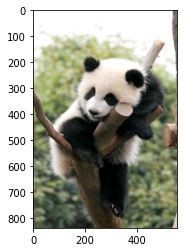

giant_panda 99.88304901123047
Image 2


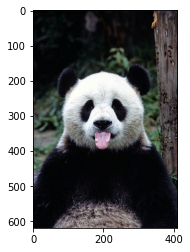

giant_panda 99.99984741210938
Image 3


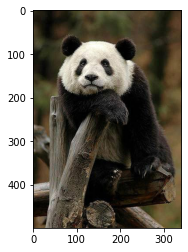

giant_panda 99.9942398071289
Image 4


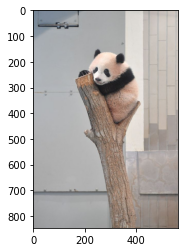

meerkat 18.719985961914062
Image 5


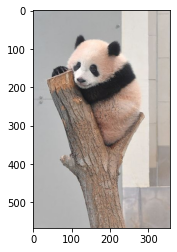

giant_panda 84.87471008300781
Image 6


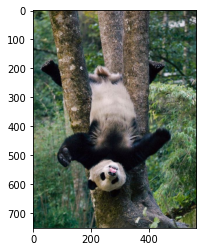

giant_panda 79.115478515625
Image 7


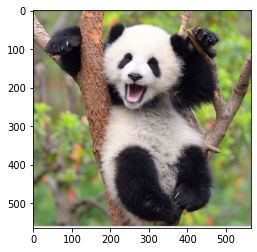

giant_panda 80.86228942871094
Image 8


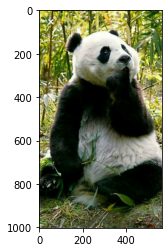

giant_panda 99.99976348876953
Image 9


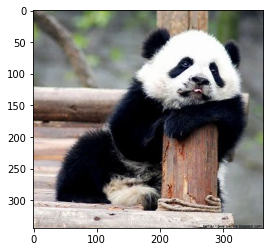

giant_panda 98.6248550415039
Image 10


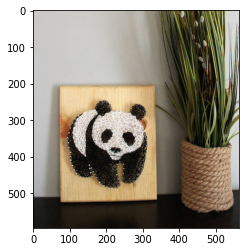

teddy 15.194365501403809
Image 11


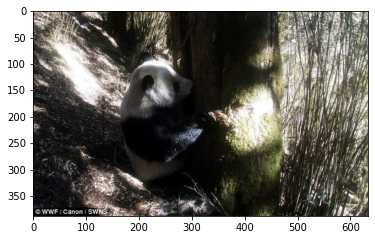

gorilla 34.712669372558594
Image 12


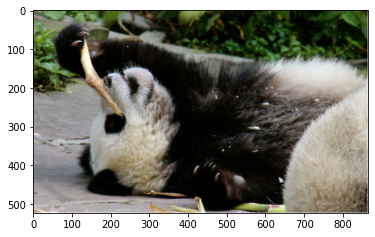

giant_panda 97.05396270751953
Image 13


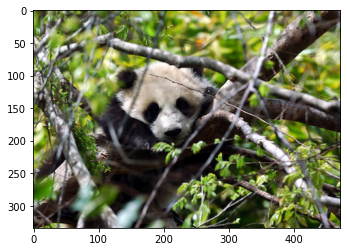

Madagascar_cat 70.05818176269531
Image 14


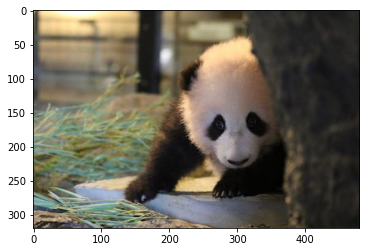

giant_panda 97.38189697265625


In [9]:
model.eval()   # put network in evaluation mode
for i in range(1,14+1):
    print('Image '+str(i))
    img = Image.open('vs3ex1data/panda/panda'+str(i)+'.jpg')
    plt.imshow(img)
    plt.show()
    plt.pause(0.1)
    # transorm image and feed to the network 
    
    img_transformed = comptran(img)
    batch_t = torch.unsqueeze(img_transformed, 0)
    output = model(batch_t)
    
    # print the predicted class and corresponding probability
    
    _, index = torch.max(output, 1)

    percentage = torch.nn.functional.softmax(output, dim=1)[0] * 100

    print(class_names[index[0]], percentage[index[0]].item())
    